In [1]:
import pandas as pd
import numpy as np


In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")


In [3]:
display(customer_df.shape)
customer_df.head()


(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
list(customer_df)


['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [5]:
customer_df = customer_df.rename(columns={"Customer": "customer", "State": "state", "Customer Lifetime Value": "customer_lifetime_value", "Response": "response", "Coverage": "coverage", "Education": "education", "Effective To Date": "effective_to_date", "EmploymentStatus": "employment_status", "Gender": "gender", "Income": "income", "Location Code": "location_code", "Marital Status": "marital_status", "Monthly Premium Auto": "monthly_premium_auto", "Months Since Last Claim": "months_since_last_claim", "Months Since Policy Inception": "months_since_policy_inception", "Number of Open Complaints": "number_of_open_complaints", "Number of Policies": "number_of_policies", "Policy Type": "policy_type", "Policy": "policy", "Renew Offer Type": "renew_offer_type", "Sales Channel": "sales_channel", "Total Claim Amount": "total_claim_amount", "Vehicle Class": "vehicle_class", "Vehicle Size": "vehicle_size"})


In [6]:
list(customer_df)


['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [7]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"], format="%m/%d/%y")


In [8]:
customer_df["effective_to_date"]


0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [9]:
customer_df.dtypes


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [10]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [11]:
numerical_df.nunique()


customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [12]:
continuous_df = numerical_df.drop(["monthly_premium_auto", "months_since_last_claim", "months_since_policy_inception", "number_of_open_complaints", "number_of_policies"], axis=1)
continuous_df.head()


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


In [13]:
discrete_df = numerical_df.drop(["customer_lifetime_value", "income", "total_claim_amount"], axis=1)
discrete_df.head()


,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
correlations_matrix = numerical_df.corr()
correlations_matrix


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


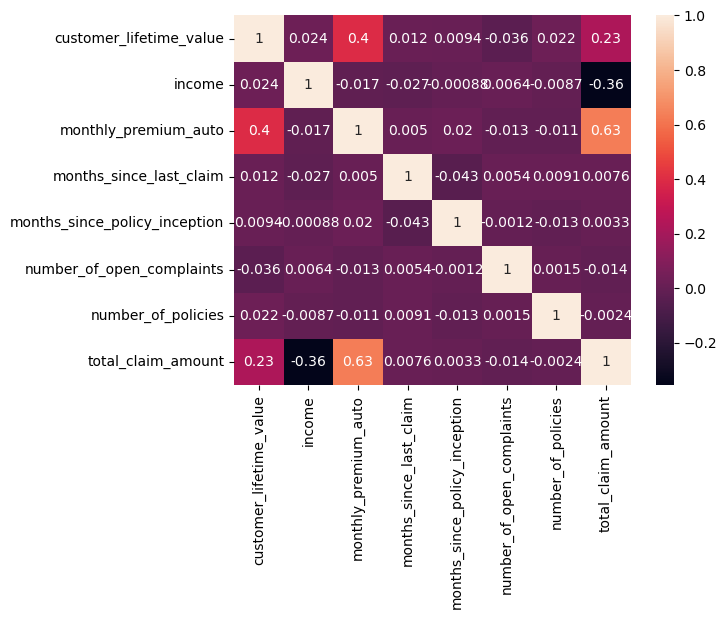

In [16]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()


C:\Users\kr_sh\AnAcOndA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


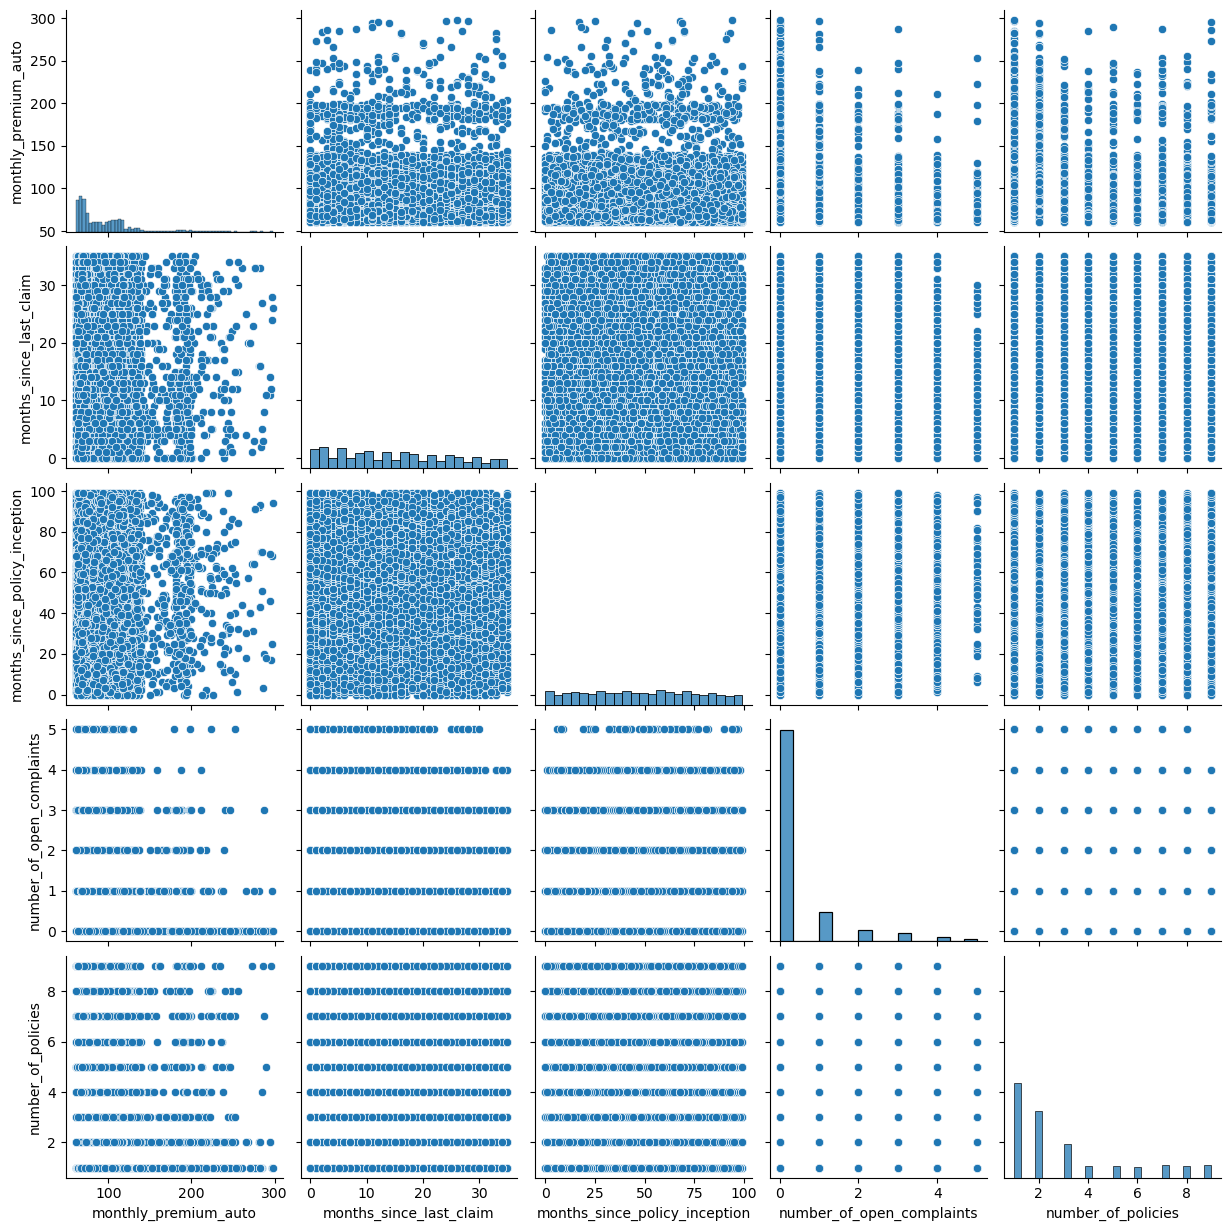

In [17]:
sns.pairplot(discrete_df)


C:\Users\kr_sh\AnAcOndA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


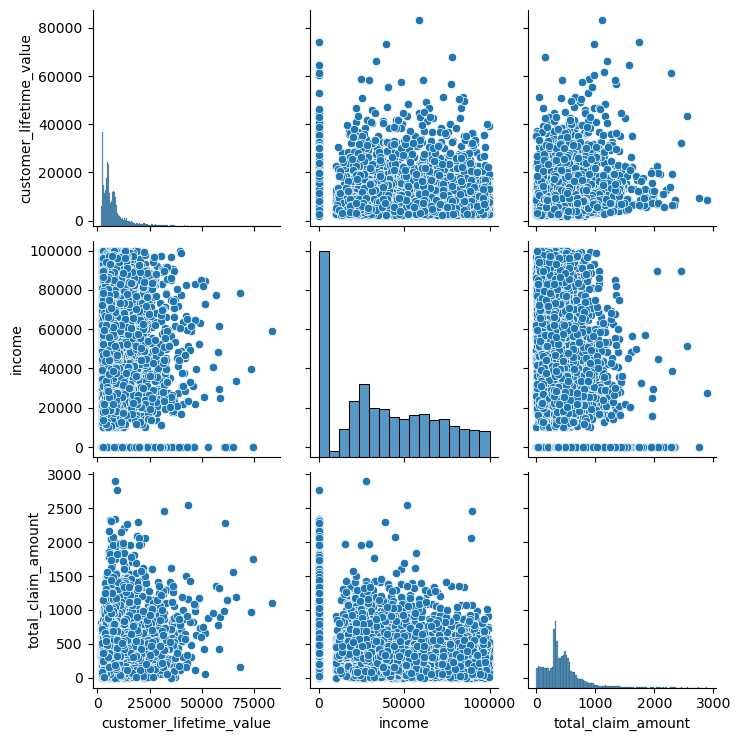

In [18]:
sns.pairplot(continuous_df)


In [19]:
numerical_df.to_csv("numerical_df.csv", index=False)


In [20]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.head()


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [21]:
categorical_df.isna().sum()


customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [22]:
categorical_df.describe()


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [23]:
print(categorical_df["coverage"].unique())
print(categorical_df["location_code"].unique())
print(categorical_df["policy_type"].unique())
print(categorical_df["policy"].unique())
print(categorical_df["renew_offer_type"].unique())
print(categorical_df["sales_channel"].unique())
print(categorical_df["vehicle_class"].unique())
print(categorical_df["vehicle_size"].unique())


['Basic' 'Extended' 'Premium']
['Suburban' 'Rural' 'Urban']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [24]:
categorical_df_clean = categorical_df.drop(["customer", "policy", "vehicle_size"], axis=1)
categorical_df_clean.head()


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car


In [25]:
categorical_df_clean.to_csv("categorical_df_clean.csv", index=False)
